### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table
from scipy.interpolate import interp1d

### Preprocessing
The class has the folloowing variables:
- Private:
    - **__raw_time, __raw_rate**: The raw data obtained from the file
    - **__arr_time, __arr_rate**: Te 2D Matrix of each continuous interval of raw data
    - **__smooth_time, __smooth_rate**: The 2D Matrix of each continuous interval of smoothened data

- Public:
    - **time, rate**: The final interpolated data, to be used later

In [2]:
class Preprocessing():
    def __init__(self, file_path):
        self.__raw_time, self.__raw_rate = self.__read_file(file_path)
        self.__arr_time, self.__arr_rate = self.__find_intervals()
        self.__smooth_time, self.__smooth_rate = self.__smoothen_intervals()
        self.time, self.rate = self.__interpolate()

    def __read_file(self, file_path):
        table = Table.read(file_path)
        t0 = table['TIME'][0]
        time = [int(t - t0) for t in table['TIME']]
        rate = table['RATE']
        return time, rate

    def __find_intervals(self):
        t1 = []
        r1 = []
        for i in range(len(self.__raw_time)-1):
            t1.append(self.__raw_time[i])
            r1.append(self.__raw_rate[i])
            if (self.__raw_time[i+1]-self.__raw_time[i] == 2):
                t1.append(self.__raw_time[i] + 1)
                r1.append((self.__raw_rate[i] + self.__raw_rate[i+1]) / 2)
        s = []
        e = []
        s.append(0)
        for i in range(1, len(t1)):
            if (t1[i]-t1[i-1] > 1):
                e.append(i)
                s.append(i)
        e.append(len(t1))
        t2 = []
        r2 = []
        for i in range(len(s)):
            x = []
            y = []
            for j in range(s[i], e[i]):
                x.append(t1[j])
                y.append(r1[j])
            t2.append(x)
            r2.append(y)
        return t2, r2

    def __smoothen_intervals(self):
        time = []
        rate = []
        for i in range(len(self.__arr_time)):
            x = self.__arr_time[i]
            y = self.__arr_rate[i]
            if (len(x) >= 240):
                norm = []
                norm_dp = []
                window_size = 240 * int(1 / (1 + np.exp(-1 * (len(x) - 240))))
                shift = window_size // 2
                norm.append(np.mean(y[0:window_size]))
                norm_dp.append(x[0])
                for j in range(window_size, len(y), shift):
                    temp = np.mean(y[j:j+shift])
                    norm.append(temp)
                    norm_dp.append(x[j])
                norm = np.array(norm)
                norm_dp = np.array(norm_dp)
                x_new = np.linspace(x[0], x[0]+len(x), x[0]+len(x))
                func = interp1d(norm_dp, norm, fill_value='extrapolate', kind='linear')
                y_new = func(x_new)
                time.append(x_new)
                rate.append(y_new)
        return time, rate

    def __interpolate(self):
        x = []
        y = []
        for i in range(len(self.__smooth_time)):
            for j in range(len(self.__smooth_time[i])):
                x.append(self.__smooth_time[i][j])
                y.append(self.__smooth_rate[i][j])
        x_new = np.linspace(int(x[0]), int(x[-1]-x[0]), int(x[-1]-x[0]))
        func = interp1d(x, y, fill_value='extrapolate', kind='linear')
        y_new = func(x_new)
        return x_new, y_new

    def plot_raw_data(self):
        plt.figure(figsize=(30, 10))
        plt.title("Raw Data")
        plt.xlabel("Time (in sec)")
        plt.ylabel("Count Rate")
        plt.scatter(self.__raw_time, self.__raw_rate, s=0.3)
        plt.grid()
        plt.show()

    def plot_individual_intervals(self):
        plt.figure(figsize=(30, 10))
        plt.title("Individual Interval Data")
        plt.xlabel("Time (in sec)")
        plt.ylabel("Count Rate")
        for i in range(len(self.__arr_time)):
            plt.scatter(self.__arr_time[i], self.__arr_rate[i], s=0.3)
        plt.grid()
        plt.show()

    def plot_smoothened_intervals(self):
        plt.figure(figsize=(30, 10))
        plt.title("Smoothened Interval Data")
        plt.xlabel("Time (in sec)")
        plt.ylabel("Count Rate")
        for i in range(len(self.__smooth_time)):
            plt.scatter(self.__smooth_time[i], self.__smooth_rate[i], s=0.1)
        plt.grid()
        plt.show()

    def plot_interpolated_data(self):
        plt.figure(figsize=(30, 10))
        plt.title("Linearly Interpolated Data")
        plt.xlabel("Time (in sec)")
        plt.ylabel("Count Rate")
        plt.plot(self.time, self.rate)
        plt.grid()
        plt.show()

### Reading data

In [3]:
path_to_lc = './LC Files/ch2_xsm_20200928_v1_level2.lc'
data = Preprocessing(path_to_lc)

### Plotting raw data

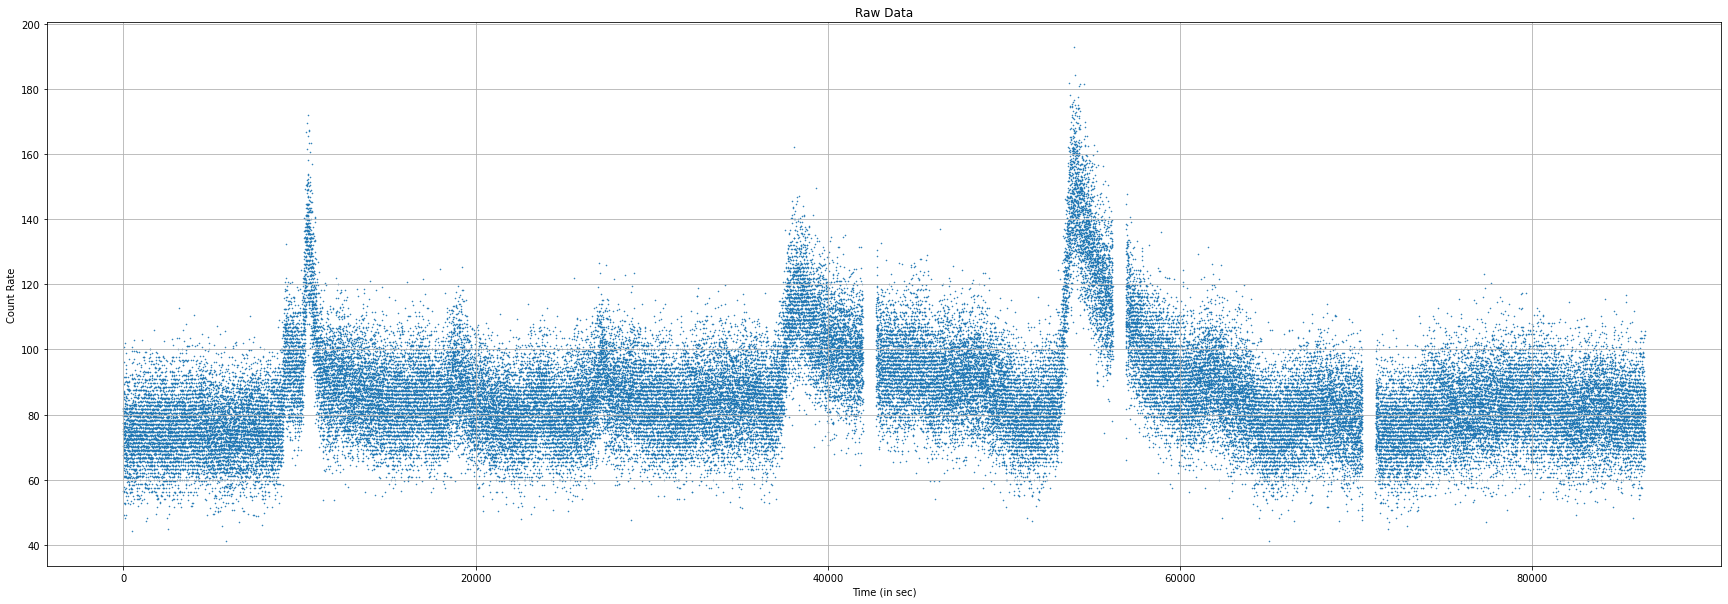

In [4]:
data.plot_raw_data()

### Plotting individual intervals

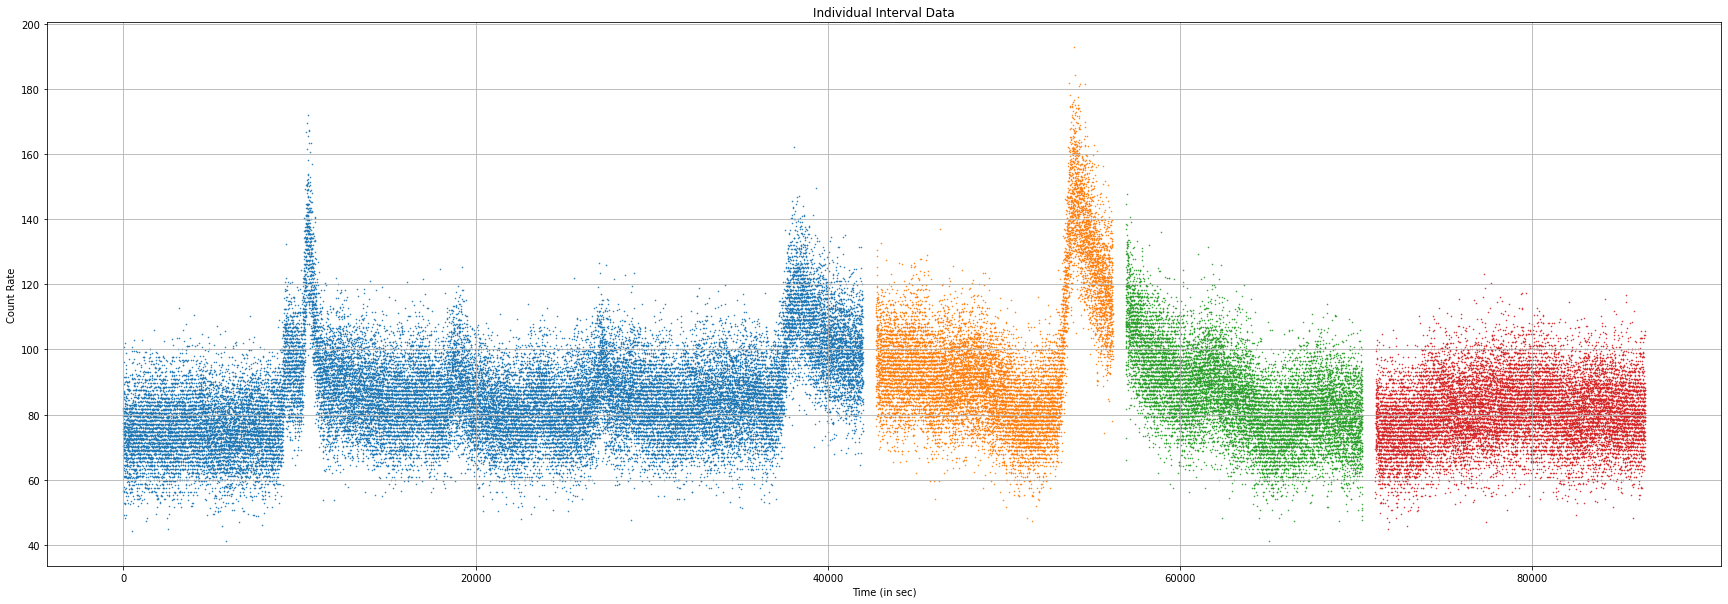

In [5]:
data.plot_individual_intervals()

### Plotting smoothened intervals

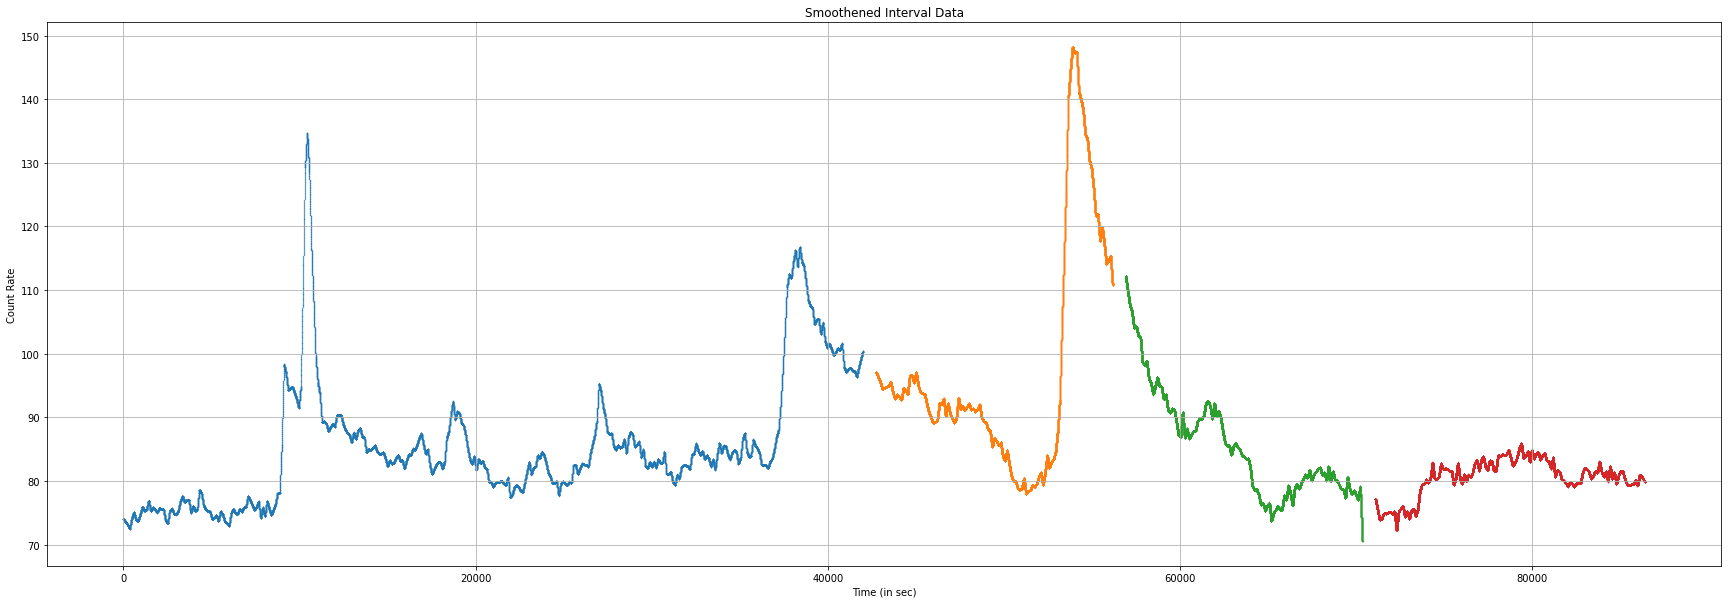

In [6]:
data.plot_smoothened_intervals()

### Plotting interpolated data

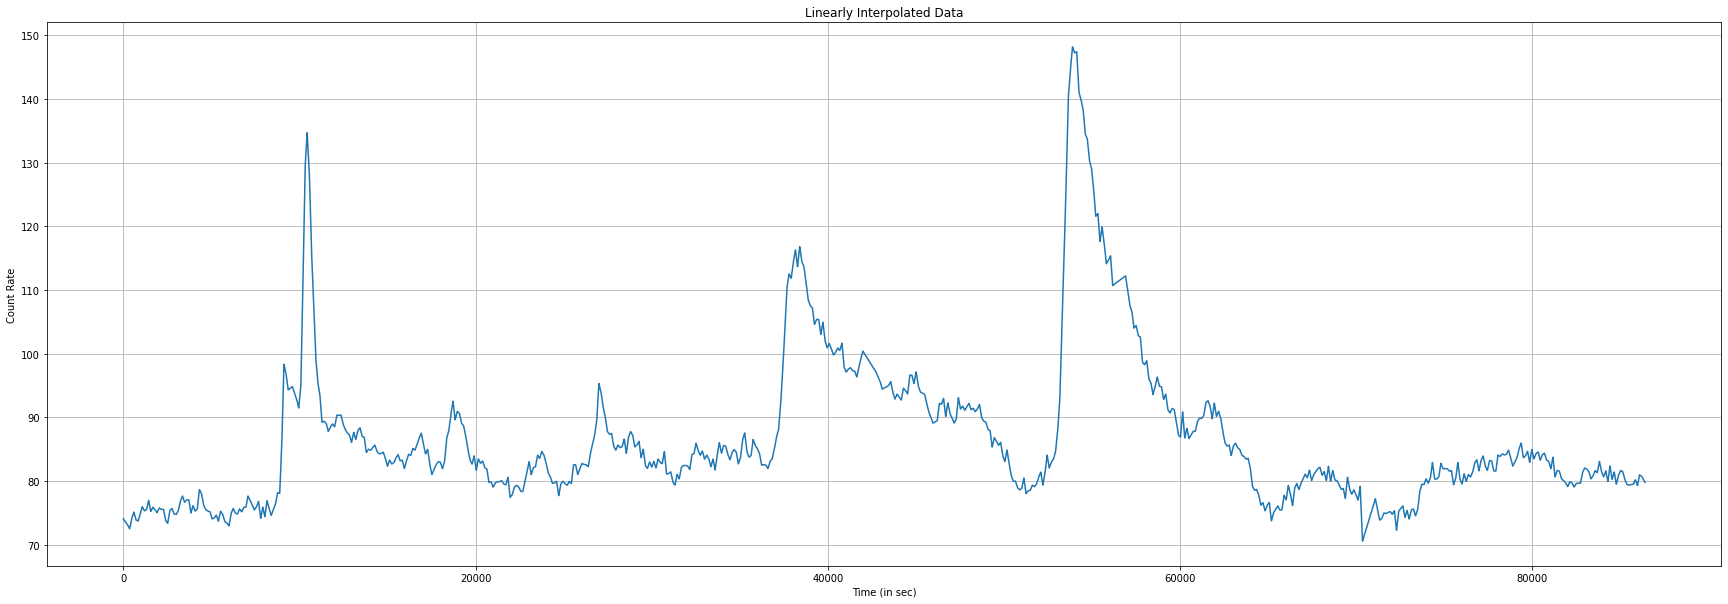

In [7]:
data.plot_interpolated_data()